In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from scipy.interpolate import splrep, BSpline

In [2]:
raw_data = pd.read_excel("CART Musc FIs sorted.xlsx", sheet_name=None, header=None)
raw_data.keys()

dict_keys(['CART BL', 'CART Post', 'Musc BL', 'Musc Post'])

In [3]:
df = raw_data["CART BL"][:]
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,Date,2014-03-01 00:00:00,NaN,2022-03-01 00:00:00,NaN,2025-03-01 00:00:00,NaN,15.04.2019,NaN,2022-04-01 00:00:00,...,NaN,2020-02-20 00:00:00,NaN,2020-02-20 00:00:00,NaN,2020-02-20 00:00:00,NaN,2020-02-20 00:00:00,NaN,Drug
1,Cell No,5,NaN,3,NaN,3,NaN,1,NaN,1,...,NaN,1,NaN,2,NaN,3,NaN,4,NaN,NaN
2,Rin,28.2,NaN,64.3,NaN,40.16,NaN,41.2,NaN,46.3,...,NaN,37.9,NaN,52,NaN,8.24,NaN,21.7,NaN,NaN
3,Rheo,408.25998,NaN,65.799995,NaN,267.799995,NaN,557.58,NaN,149.870002,...,NaN,358.655,NaN,64.83,NaN,932.839961,NaN,723.93498,NaN,NaN
4,Type,1,NaN,2,NaN,1,NaN,2,NaN,2,...,NaN,1,NaN,2,NaN,1,NaN,1,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,408.25998,NaN,65.799995,NaN,267.799995,NaN,557.58,NaN,149.870002,...,NaN,358.655,NaN,64.83,NaN,932.839961,NaN,723.93498,NaN,NaN
7,NaN,422.90998,6.821282,87.220002,4.666356,294.999995,3.676471,568.78,8.928572,171.58,...,7.990411,368.51999,10.136847,86.739998,4.565168,937.220039,22.857143,731.20998,13.755158,NaN
8,NaN,438.45002,6.439150,104.63,5.743825,304.049995,11.049724,579.85002,9.033423,190.01999,...,10.666667,377.60998,11.001101,105.785005,5.249344,941.739961,22.148394,738.32502,14.054813,NaN
9,NaN,451.90002,7.429420,119.570002,6.697924,318.249995,7.042253,590.44001,9.451796,205.749995,...,9.945301,385.86501,12.113871,122.655,5.929440,946.22502,22.296543,743.85998,18.083183,NaN


In [5]:
empty_row = df.isna().sum(axis=1).argmax()
df2 = df.iloc[empty_row+1:].drop(columns=0).reset_index(drop=True)
last_row = [i for i, x in enumerate(df2.iloc[1].isna()) if x][0]
df2 = df2[df2.columns[range(last_row)]]
df2

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,408.25998,NaN,65.799995,NaN,267.799995,NaN,557.58,NaN,149.870002,NaN,...,55.810005,NaN,358.655,NaN,64.83,NaN,932.839961,NaN,723.93498,NaN
1,422.90998,6.821282,87.220002,4.666356,294.999995,3.676471,568.78,8.928572,171.58,4.604052,...,68.324995,7.990411,368.51999,10.136847,86.739998,4.565168,937.220039,22.857143,731.20998,13.755158
2,438.45002,6.439150,104.63,5.743825,304.049995,11.049724,579.85002,9.033423,190.01999,5.425936,...,77.699995,10.666667,377.60998,11.001101,105.785005,5.249344,941.739961,22.148394,738.32502,14.054813
3,451.90002,7.429420,119.570002,6.697924,318.249995,7.042253,590.44001,9.451796,205.749995,6.357279,...,87.755,9.945301,385.86501,12.113871,122.655,5.929440,946.22502,22.296543,743.85998,18.083183
4,462.78,9.199632,133.639998,7.107320,329.660005,8.764242,601.93,8.695652,219.499995,7.272727,...,98.239998,9.537435,393.31501,13.422819,137.145002,6.898931,951.170039,20.202021,749.81501,16.792612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
n1 = df2.loc[:,2].notna()
n2 = np.where((df2[2].notna()) & (df2[1] < 3000) & (df2[1] > 1000))

x1 = df2.loc[n1, 1].astype(float)
y1 = df2.loc[n1, 2].astype(float)

x2 = df2.loc[n2, 1].astype(float)
y2 = df2.loc[n2, 2].astype(float)

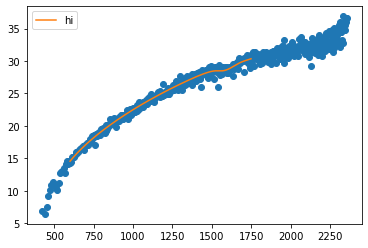

14.534260910020262 -77.9845921770018 0.9987734911011575 0.997548486526394 0.0 0.021265330818699545
0.997548486526394


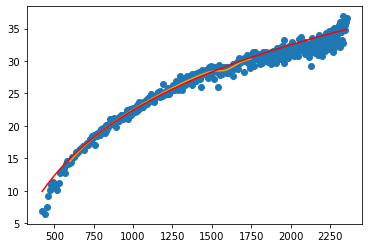

In [7]:
tck = splrep(x1, y1, s=200)
xnew = np.arange(600, 1750, 1)
plt.plot(x1, y1, 'o')
plt.plot(xnew, BSpline(*tck)(xnew), "-", label="hi")
plt.legend()
plt.show()

dx = xnew
dy = BSpline(*tck)(xnew)

a, b = np.polyfit(np.log(dx), dy, 1)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log(dx), dy)
print(slope, intercept, r_value, r_value**2, p_value, std_err)
print(r_value**2)

plt.scatter(x1, y1)
plt.plot(dx, dy, color="orange")
plt.plot(x1, slope*np.log(x1)+intercept, color="red")
plt.show()